In [1]:
from SpecReduction import SpecFunctions as sf
import numpy as np
import pandas as pd
import scipy
import scipy.optimize as opt
from scipy.optimize import curve_fit
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from aquarel import load_theme

In [2]:
theme = load_theme('solarized_dark')
theme.apply()

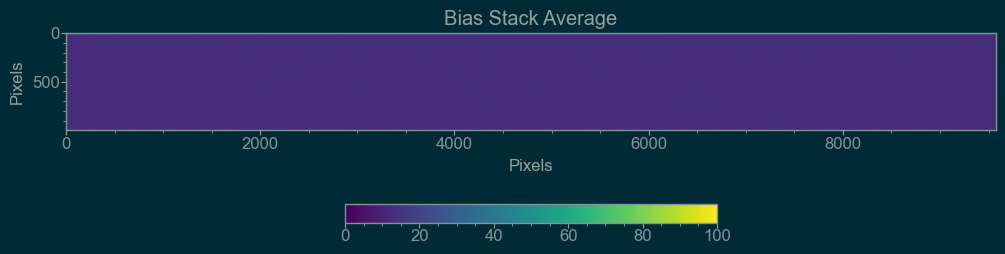

In [3]:
#median of bias frames stack (5 images)
bias_path = f'Bias729_short/2025-07-29-2238_7-CapObj_'
bias_shape = fits.open(f'Bias729_short/2025-07-29-2238_7-CapObj_0003.FIT')[0].data.shape
bias_avg = sf.median_img(5, bias_path, bias_shape[0], bias_shape[1])

plt.figure(figsize = (12,12))
plt.imshow(bias_avg)
plt.title('Bias Stack Average')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

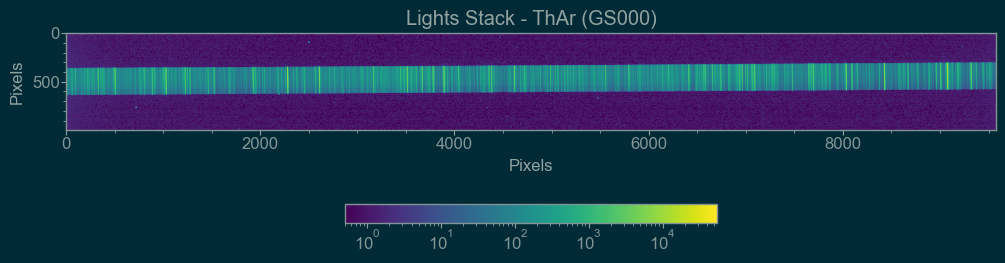

In [4]:
#median of lights stack (10 images)
lights_path = f'ThAr_GS000_lights_short/2025-07-29-2227_6-CapObj_'
lights_shape = fits.open(f'ThAr_GS000_lights_short/2025-07-29-2227_6-CapObj_0002.FIT')[0].data.shape
lights_avg = sf.median_img(10,lights_path, lights_shape[0], lights_shape[1])

#subtract bias from lights
lights_avg = lights_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(lights_avg, norm = 'log')
plt.title('Lights Stack - ThAr (GS000)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

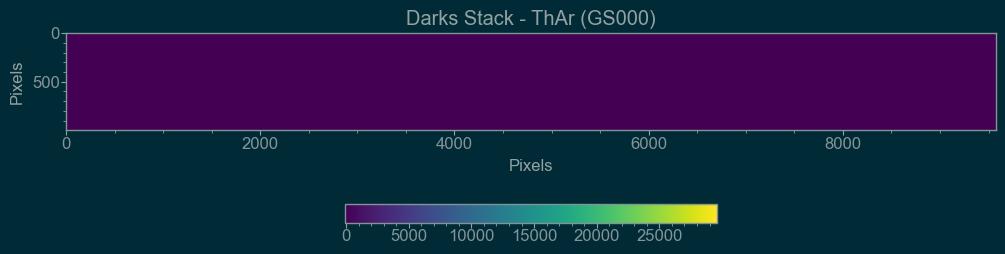

In [5]:
#median of darks stack (10 images)
darks_path = f'ThAr_GS000_darks_short/2025-07-29-2233_2-CapObj_'
darks_shape = fits.open(f'ThAr_GS000_darks_short/2025-07-29-2233_2-CapObj_0002.FIT')[0].data.shape
darks_avg = sf.median_img(10,darks_path, darks_shape[0], darks_shape[1])

#subtract bias from darks
darks_avg = darks_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(darks_avg)
plt.title('Darks Stack - ThAr (GS000)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()


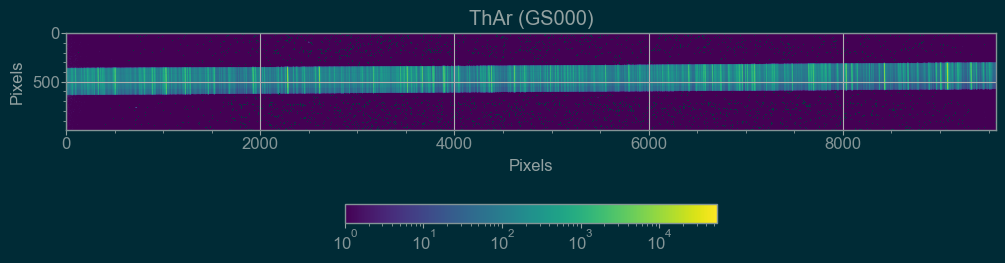

In [6]:
ThAr_subtracted = lights_avg - darks_avg

plt.figure(figsize = (12,12))
plt.imshow(ThAr_subtracted, norm = 'log')
plt.title('ThAr (GS000)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.grid(True)
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

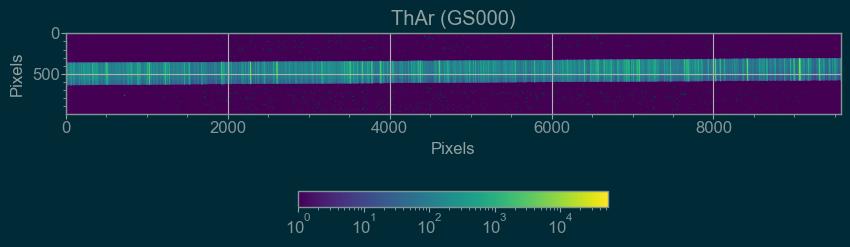

In [25]:
#Replot previous image using saved fits file - saves time/power
ThAr_download_sub = fits.open(f'subtracted_ThArGS000_short_stack.FIT')[0].data
plt.figure(figsize = (10,10))
plt.imshow(ThAr_download_sub, norm = 'log')
plt.title('ThAr (GS000)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.grid(True)
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.1)
plt.show()

-0.6164230697169267


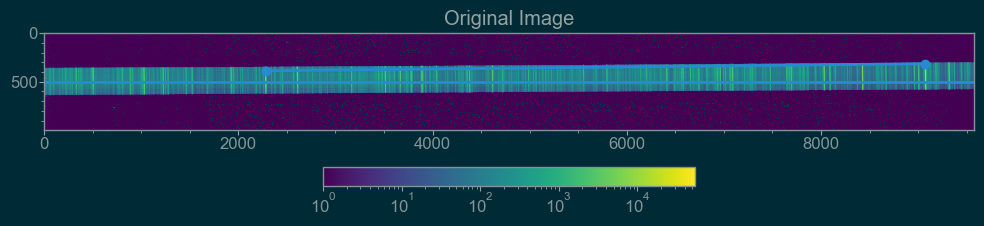

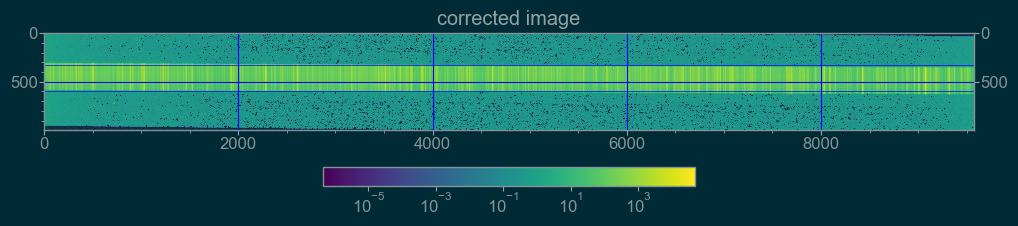

In [9]:
corrected_ThAr = sf.straight_spec(ThAr_subtracted, 1.3)

0.24488835489567723


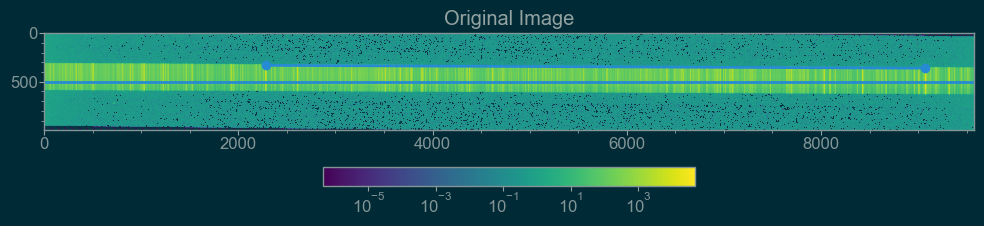

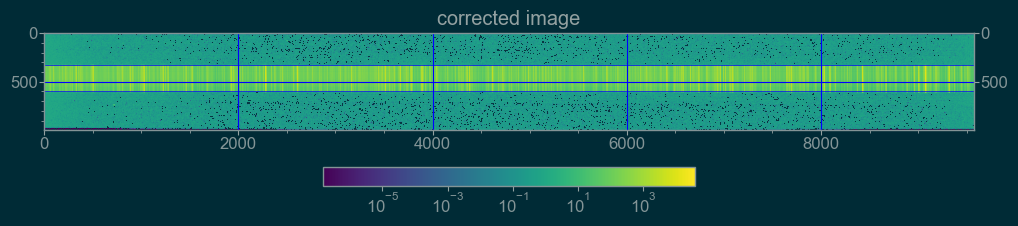

In [11]:
final_corrected_ThAr = sf.straight_spec(corrected_ThAr, 1.3)